In [1]:
import json
from PIL import Image
import purple_flamingo
from purple_flamingo.instruct import APICallProcessor

In [2]:
processor_gpt4o = APICallProcessor(
    model="gpt-4o",
    api_key="",
    mode="ift",
    sample_k=4,
    call_params={"max_tokens": 1024},
    handling_time=1.0
)
processor_gpt4o.process_json("./example_dataset.json", 
                             "./out.json",
                             "./")

ift = json.loads(processor_gpt4o.temp[0]['question'])

processor_gpt4o = APICallProcessor(
    model="gpt-4o",
    api_key="",
    mode="mc",
    sample_k=4,
    call_params={"max_tokens": 1024},
    handling_time=1.0
)
processor_gpt4o.process_json("./example_dataset.json", 
                             "./out.json",
                             "./")

mc = json.loads(processor_gpt4o.temp[0]['question'])

processor_gpt4o = APICallProcessor(
    model="gpt-4o",
    api_key="",
    mode="ddx",
    sample_k=4,
    call_params={"max_tokens": 1024},
    handling_time=1.0
)
processor_gpt4o.process_json("./example_dataset.json", 
                             "./out.json",
                             "./")

ddx = json.loads(processor_gpt4o.temp[0]['question'])

100%|██████████| 1/1 [00:04<00:00,  4.21s/it]


In [3]:
def pretty_print_questions(questions):
    print("Questions and Answers:")
    for idx, question in enumerate(questions, 1):
        print(f"{idx}. Question: {question['question']}")
        print(f"   Answer: {question['answer']}")
    print("-" * 50)

def pretty_print_mc_question(mc_question):
    print("MC Question:", mc_question['question_stem'])
    print("Answer Choices:")
    for choice in mc_question['answer_choices']:
        print(f"  - {choice}")
    print("Correct Answer:", mc_question['correct_answer'])
    print("Discussion:", mc_question['discussion'])
    print("-" * 50)

def pretty_print_differential(differential):
    print("Differential Diagnosis One-Liner:", differential['one-liner'])
    print("Possible Diagnoses:")
    for dx in differential['ddx']:
        print(f"  - {dx}")
    print("-" * 50)

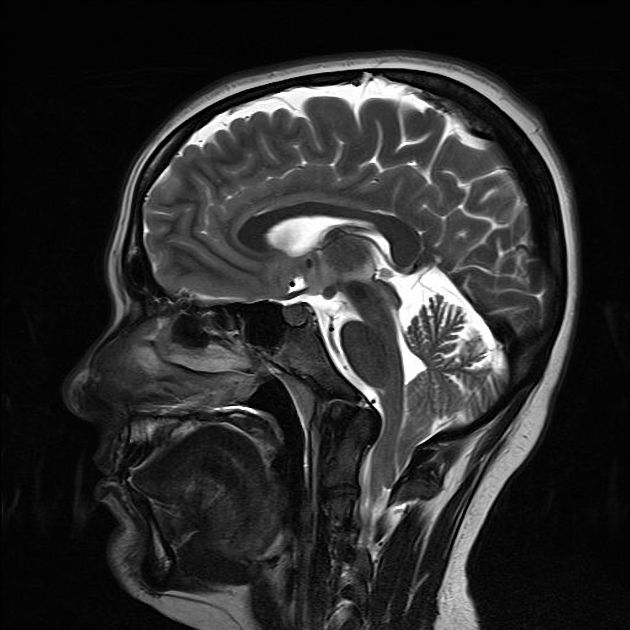

CAPTION:
Figure 3 .  A case of a patient with Chiari 1.5 malformation. A 30 year old female patient presenting with headache and dizziness. No other complaints and no trauma. A saggital T2 MRI showing a herniation of the cerebellar tonsils through the foramen magnum (about 2.0 cm), including bulb and obex herniation, associated with retroflexion of the odontoid process, with a compressive effect on the bulb, which is reduced in anteroposterior thickness. Case courtesy of Rodrigo Dias Duarte, Radiopaedia.org, rID: 50409
IN-TEXT MENTION:
Chiari 1.5 malformation, or bulbar variant of Chiari 1 malformation, is a term used in the literature to describe the combination of cerebellar tonsillar herniation (Chiari 1) along with caudal herniation of some portion of the brainstem (often obex of the medulla oblongata) through the foramen magnum. It is believed that whencongenital, it is the progression of Chiari 1 malformation. (See Fig. 3)


CONVERSATION:
Questions and Answers:
1. Question: What 

In [4]:
Image.open(processor_gpt4o.temp[0]['image']).show()

print("CAPTION:")
print(processor_gpt4o.temp[0]['fig_label'], ". ", processor_gpt4o.temp[0]['fig_caption'] )
print("IN-TEXT MENTION:")
print(processor_gpt4o.temp[0]['in_text_mention'][0])

print(f"\n\nCONVERSATION:")
pretty_print_questions(ift)
print(f"\n\nMC QUESTION:")
pretty_print_mc_question(mc)
print(f"\n\nDIFFERENTIAL:")
pretty_print_differential(ddx)